In [1]:
!pip freeze | grep tensorflow

You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
tensorflow==1.9.0
tensorflow-gpu==1.8.0
tensorflow-hub==0.1.0
tensorflowjs==0.5.2


In [2]:
# pip install tensorflow==1.9.0rc2 coremltools==0.8 tensorflowjs==0.5.0
# pip install tf-nightly==1.10.0.dev20180707
# nano /usr/local/anaconda3/envs/tf2/lib/python3.6/site-packages/tensorflow/contrib/lite/python/lite.py

In [3]:
#pip install coremltools==0.8 Keras==2.1.6 imutils==0.4.6 opencv-python==3.4.1.15


In [4]:
!ls

converted_model.tflite	     graph.lite		   model_benchmark
data			     helper.py		   models
dobgreed_mobilenet_tf.ipynb  keras.ipynb	   prep.ipynb
dobgreed_resnet.ipynb	     keras_parallel.ipynb  __pycache__
dog_breed.h5		     keras_parallel.py	   sector_labelling.ipynb
dog_breed.mlmodel	     labels.csv		   tensorflow_export.ipynb
dog_breed_tf.h5		     labels.txt		   tensorflow_tf_keras.ipynb
downloads		     MobileNet.ipynb	   tmp
fastai.ipynb		     model


In [5]:
#https://github.com/ianlokh/MobileNet-On-CoreML.git

In [6]:
!pip install --quiet  coremltools==0.8 tensorflowjs==0.5.2 tensorflow-gpu==1.9.0

```
pip uninstall tensorflow protobuf --yes

find $CONDA_PREFIX -name "tensorflow" | xargs -Ipkg rm -rfv pkg

pip install tensorflow-gpu  --upgrade --force-reinstall

pip install --ignore-installed --upgrade https://storage.googleapis.com/tensorflow/linux/cpu/tensorflow-1.9.0-cp36-cp36m-linux_x86_64.whl --no-cache-dir
```

In [7]:
import os
import shutil
import hashlib
import urllib.request
import numpy as np
import json
import keras
import tensorflow as tf
import coremltools
import tensorflowjs as tfjs
from tensorflow.python import keras as tf_keras

/home/ubuntu/anaconda3/envs/fastai/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [38]:
!cp model/food/* .

In [8]:

#from keras import backend as K
#from keras.models import load_model
#from keras.utils.generic_utils import CustomObjectScope
#from keras.applications.mobilenet import preprocess_input

#from keras.preprocessing import image
#from keras.applications.mobilenet import preprocess_input



In [39]:
!ls

converted_model.tflite	     helper.py		   model_benchmark
data			     keras.ipynb	   model.h5
dobgreed_mobilenet_tf.ipynb  keras_parallel.ipynb  models
dobgreed_resnet.ipynb	     keras_parallel.py	   prep.ipynb
dog_breed.h5		     label_classes.json    __pycache__
dog_breed.mlmodel	     labels.csv		   sector_labelling.ipynb
dog_breed_tf.h5		     labels.json	   tensorflow_export.ipynb
downloads		     labels.txt		   tensorflow_tf_keras.ipynb
fastai.ipynb		     MobileNet.ipynb	   tmp
graph.lite		     model


In [40]:
with open('model/food/labels.txt') as f:
    labels = f.read().splitlines()

In [41]:
labels_dict = {idx:label for (idx,label) in enumerate(labels)}

In [42]:
labels_dict

{0: 'bruschetta',
 1: 'fried_calamari',
 2: 'hot_and_sour_soup',
 3: 'huevos_rancheros',
 4: 'red_velvet_cake',
 5: 'spaghetti_bolognese',
 6: 'spring_rolls',
 7: 'tacos',
 8: 'tuna_tartare',
 9: 'waffles'}

In [43]:
json.dumps(labels_dict)

'{"0": "bruschetta", "1": "fried_calamari", "2": "hot_and_sour_soup", "3": "huevos_rancheros", "4": "red_velvet_cake", "5": "spaghetti_bolognese", "6": "spring_rolls", "7": "tacos", "8": "tuna_tartare", "9": "waffles"}'

In [44]:
import json
with open('label_classes.json', 'w') as fp:
    json.dump(labels_dict, fp, indent=4 )

In [34]:
labels

['bruschetta',
 'fried_calamari',
 'hot_and_sour_soup',
 'huevos_rancheros',
 'red_velvet_cake',
 'spaghetti_bolognese',
 'spring_rolls',
 'tacos',
 'tuna_tartare',
 'waffles']

In [45]:
def download_image(url,ext=".jpg"):
    url_hash = hashlib.md5(url.encode('utf-8')).hexdigest()
    file_path = f'{DOWNLOAD_FOLDER}/{url_hash}.{ext}'
    
    urllib.request.urlretrieve(url,file_path)

    img = tf_keras.preprocessing.image.load_img(file_path, target_size=(224, 224))
    return img

def predict(im, model, labels,n=5):
    out = model.predict(img_arr[None,:,:,:]).flatten()
    top_indices = out.argsort()[::-1][:n]
    
    top_probability = out[top_indices]
    top_labels = np.array(labels)[top_indices]
    
    res = list(zip(top_labels,top_probability))
    
    return res

def get_top_n_predictions(preds,labels,n=5):
    if len(preds.shape) >1:
        preds = preds.flatten()
    top_idxs = (-preds).argsort()[:n]
    res =[]
    for idx in top_idxs:
        res.append((labels[idx],preds[idx] ))
    return res

In [46]:
DOWNLOAD_FOLDER='downloads'

In [47]:
shutil.rmtree(DOWNLOAD_FOLDER,ignore_errors=True)
os.makedirs(DOWNLOAD_FOLDER, exist_ok=True)

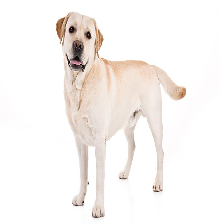

In [48]:
img_url = "https://s3.amazonaws.com/cdn-origin-etr.akc.org/wp-content/uploads/2017/11/12231410/Labrador-Retriever-On-White-01.jpg"
img = download_image(img_url)
img


In [49]:
img_preprocessed = keras.applications.mobilenet.preprocess_input (
        tf_keras.preprocessing.image.img_to_array(img)
)

In [50]:
img_arr = keras.applications.mobilenet.preprocess_input (
        tf_keras.preprocessing.image.img_to_array(img)
)

# Keras

In [51]:
def load_keras_model(model_path):
    with keras.utils.generic_utils.CustomObjectScope({'relu6': keras.applications.mobilenet.relu6,'DepthwiseConv2D': keras.applications.mobilenet.DepthwiseConv2D}):
        keras_model =  keras.models.load_model(model_path)
    return keras_model

In [52]:
keras_model = load_keras_model(model_path='model.h5')


In [53]:
predict(im=img_preprocessed ,model=keras_model, labels=labels)

[('spring_rolls', 0.5268984),
 ('waffles', 0.29262805),
 ('tuna_tartare', 0.072455585),
 ('red_velvet_cake', 0.028541096),
 ('tacos', 0.025147093)]

# Tensorflow Estimator

In [25]:
from tensorflow.python import keras as tf_keras

In [26]:
#from tensorflow.python.keras.models import load_model


In [27]:
def load_keras_using_tf(model_path):

    custom_objects={'relu6': tf_keras.applications.mobilenet.relu6,'DepthwiseConv2D': tf_keras.applications.mobilenet.DepthwiseConv2D}
    
    model = tf_keras.models.load_model(model_path,custom_objects=custom_objects)
        
    mobilenet_estimator = tf.keras.estimator.model_to_estimator(keras_model=model, custom_objects={'relu6': tf_keras.applications.mobilenet.relu6})
    
    return mobilenet_estimator

In [28]:
tf_keras_model = load_keras_using_tf('dog_breed.h5')

AttributeError: module 'tensorflow.python.keras.applications.mobilenet' has no attribute 'relu6'

In [ ]:
predict_input_fn = tf.estimator.inputs.numpy_input_fn(
  x={"input_1": img_preprocessed[None,:,:,:]},
  num_epochs=1,
  shuffle=False)

In [ ]:
predictions = list(tf_keras_model.predict(input_fn=predict_input_fn))
preds= predictions[0]['dense_1']
get_top_n_predictions(preds=preds,labels=labels)

# convert tfjs

In [54]:
?tfjs.converters.save_keras_model

In [55]:
artifacts_dir = 'tfjs_artifacts'

In [59]:
!mkdir -p {artifacts_dir}

In [60]:
shutil.rmtree(artifacts_dir)

In [61]:
tfjs.converters.save_keras_model(
    model = keras_model, 
    artifacts_dir=artifacts_dir)

# convert tflite

Convert model to tensorflow signature graph

In [62]:
def save_model(keras_model_path:str, path:str):
    #https://gist.github.com/asimshankar/000b8d276f211f972168afa138eb3cc7
    shutil.rmtree(path,ignore_errors=True)
    keras.backend.set_learning_phase(0)

    with keras.backend.get_session() as sess:
        # load keras model
        custom_objects={'relu6': keras.applications.mobilenet.relu6,'DepthwiseConv2D': keras.applications.mobilenet.DepthwiseConv2D}
        model = keras.models.load_model(keras_model_path, custom_objects=custom_objects)


        # code to convert to tensorflow saved models
        signature = tf.saved_model.signature_def_utils.predict_signature_def(                                                                        
        inputs={'image': model.input}, outputs={'scores': model.output})                                                                         

        
        builder = tf.saved_model.builder.SavedModelBuilder(path) 

        builder.add_meta_graph_and_variables(                                                                                                        
                sess=sess,                                                                                                                    
                tags=[tf.saved_model.tag_constants.SERVING],                                                                                             
                signature_def_map={                                                                                                                      
                    tf.saved_model.signature_constants.DEFAULT_SERVING_SIGNATURE_DEF_KEY:                                                                
                        signature                                                                                                                        
                })                                                                                                                                       
        builder.save()

In [63]:
keras.backend.clear_session()

In [64]:
model_path = "prod_models"

In [65]:
save_model(keras_model_path='model.h5', path=model_path)

INFO:tensorflow:No assets to save.


INFO:tensorflow:No assets to save.


INFO:tensorflow:No assets to write.


INFO:tensorflow:No assets to write.


INFO:tensorflow:SavedModel written to: b'prod_models/saved_model.pb'


INFO:tensorflow:SavedModel written to: b'prod_models/saved_model.pb'


In [68]:
def convert_to_tf_lite(model_dir, dest_name='graph.lite'):
    converter = tf.contrib.lite.TocoConverter.from_saved_model(model_dir)
    tflite_model = converter.convert()
    open(dest_name, "wb").write(tflite_model)   

In [69]:
convert_to_tf_lite(model_dir=model_path)

AttributeError: module 'tensorflow.contrib.lite.python.lite' has no attribute 'ToConverter'

In [77]:
from IPython.display import FileLink

In [78]:
FileLink('labels.csv')

/home/ubuntu/deep_learning_workshop/training/labels.csv

In [79]:
FileLink('labels.txt')

/home/ubuntu/deep_learning_workshop/training/labels.txt

In [80]:
FileLink('model.h5')

/home/ubuntu/deep_learning_workshop/training/model.h5

In [81]:
FileLink('model.mlmodel')

/home/ubuntu/deep_learning_workshop/training/model.mlmodel

# coreml

https://developer.apple.com/documentation/vision/classifying_images_with_vision_and_core_ml

In [70]:
keras.backend.clear_session()

In [72]:
model = load_keras_model(model_path='model.h5')


Because the Keras model was trained on ImageNet, need to subtract the mean from RGB

- red_bias=-123.68
- green_bias=-116.78
- blue_bias=-103.94

In [73]:
scale = 1./255
coreml_model = coremltools.converters.keras.convert(model,
                                                    input_names = 'image',
                                                    output_names = 'output',
                                                    image_input_names = 'image',
                                                    image_scale = scale,
                                                    red_bias = -123.68 * scale,
                                                    green_bias = -116.779 * scale,
                                                    blue_bias = -103.939 * scale,
                                                    class_labels=labels)

coreml_model.author = 'Nidhin Pattaniyil'
coreml_model.license = 'MIT'
coreml_model.short_description = 'Model to classify 120 dog breed'
coreml_model.input_description['image'] = 'Images from camera in CVPixelBuffer'
coreml_model.output_description['output'] = 'Predicted dog breed '

coreml_model.save('model.mlmodel')

0 : input_1, <keras.engine.topology.InputLayer object at 0x7f8830025710>
1 : conv1_pad, <keras.layers.convolutional.ZeroPadding2D object at 0x7f8830025780>
2 : conv1, <keras.layers.convolutional.Conv2D object at 0x7f88300259e8>
3 : conv1_bn, <keras.layers.normalization.BatchNormalization object at 0x7f8830025ac8>
4 : conv1_relu, <keras.layers.core.Activation object at 0x7f88300257f0>
5 : conv_pad_1, <keras.layers.convolutional.ZeroPadding2D object at 0x7f8830025ba8>
6 : conv_dw_1, <keras.applications.mobilenet.DepthwiseConv2D object at 0x7f8830025be0>
7 : conv_dw_1_bn, <keras.layers.normalization.BatchNormalization object at 0x7f8830025c50>
8 : conv_dw_1_relu, <keras.layers.core.Activation object at 0x7f8830025cc0>
9 : conv_pw_1, <keras.layers.convolutional.Conv2D object at 0x7f8830025f98>
10 : conv_pw_1_bn, <keras.layers.normalization.BatchNormalization object at 0x7f8830029160>
11 : conv_pw_1_relu, <keras.layers.core.Activation object at 0x7f88300292b0>
12 : conv_pad_2, <keras.layers

In [74]:
from tensorflow.python.keras import Sequential
from tensorflow.python.keras import models
from tensorflow.python.keras import layers


In [75]:
import tensorflow as tf
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.utils import CustomObjectScope
def relu6(x):
    return K.relu(x, max_value=6)
with CustomObjectScope({'relu6': relu6}):
    keras_mobilenet= tf.keras.models.load_model(filepath='dog_breed.h5')

    mobilenet_estimator = tf.keras.estimator.model_to_estimator(keras_model=keras_mobilenet,  custom_objects={'relu6': relu6})

INFO:tensorflow:Using the Keras model provided.


INFO:tensorflow:Using the Keras model provided.


INFO:tensorflow:Using default config.


INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmph8drx66f', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f882c4c19b0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmph8drx66f', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f882c4c19b0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [ ]:
predict_input_fn = tf.estimator.inputs.numpy_input_fn(
  x={"input_1": preprocess_input(image.img_to_array(img))[None,:,:,:]},
  num_epochs=1,
  shuffle=False)

In [ ]:
predictions = list(mobilenet_estimator.predict(input_fn=predict_input_fn))
#predicted_classes = [p["classes"] for p in predictions]

In [ ]:
preds= predictions[0]['dense_1']
get_top_n_predictions(preds=preds,labels=labels)

In [ ]:
predictions = list(mobilenet_estimator.predict(input_fn=predict_input_fn))
preds= predictions[0]['dense_1']
get_top_n_predictions(preds=preds,labels=labels)

In [ ]:
def serving_input_receiver_fn():
    inputs = {
        'input_1': tf.placeholder(tf.float32, [None, 224, 224, 3]),
      }
    return tf.estimator.export.ServingInputReceiver(inputs)


In [ ]:
?mobilenet_estimator.export_savedmodel

In [ ]:
!rm -rf tmp

In [ ]:
?mobilenet_estimator.export_savedmodel

In [ ]:
mobilenet_estimator.export_savedmodel(export_dir_base='tmp'
                                      ,serving_input_receiver_fn=serving_input_receiver_fn)

In [ ]:
?tf.estimator.export.ServingInputReceiver

In [ ]:
?mobilenet_estimator.export_savedmodel

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import mobilenet

In [ ]:
from tensorflow.python.keras.utils.generic_utils import CustomObjectScope
from tensorflow.python.keras.applications import mobilenet
from tensorflow.python.keras.models import load_model
with CustomObjectScope({'relu6': mobilenet.relu6,'DepthwiseConv2D': mobilenet.DepthwiseConv2D}):
    model = load_model('dog_breed.h5')
    converter = tf.contrib.lite.TocoConverter.from_keras_model_file("dog_breed.h5")
    
    tflite_model = converter.convert()
    open("dog_breed.tflite", "wb").write(tflite_model)